In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-rishikesh-2015/data_modified(till2015).xlsx
/kaggle/input/rishi-edited/rishikesh_edited.xlsx


In [7]:
import fbprophet

In [8]:
dataset = pd.read_excel('../input/rishi-edited/rishikesh_edited.xlsx',parse_dates=['Date'])
n_obs=20
dataset.columns = ['Date', 'pH', 'Temp', 'Alkanity', 'Ca', 'Mg', 'DO', 'BOD', 'Cl']
X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
print(X_train.shape, X_test.shape)

(281, 9) (20, 9)


In [9]:
X_train

,Date,pH,Temp,Alkanity,Ca,Mg,DO,BOD,Cl
0,1995-06-01,8.00,14.5,64.0,22.0,13.6,8.6,1.4,6.0
1,1995-07-01,8.10,18.5,56.0,22.0,12.5,8.3,1.3,5.0
2,1995-08-01,7.90,18.5,48.0,15.0,9.4,7.7,1.2,4.0
3,1995-09-01,8.10,18.0,40.0,12.0,7.3,7.7,1.2,3.0
4,1995-10-01,8.10,17.5,44.0,12.0,9.4,8.4,1.3,4.0
...,...,...,...,...,...,...,...,...,...
276,2018-06-01,7.42,20.0,64.0,40.0,34.0,9.8,1.0,5.0
277,2018-07-01,7.45,20.0,74.0,46.0,34.0,10.0,1.0,5.0
278,2018-08-01,7.56,22.0,76.0,44.0,38.0,9.8,1.2,5.0
279,2018-09-01,7.68,18.0,68.0,44.0,34.0,9.8,0.8,5.0


In [10]:
X_test

,Date,pH,Temp,Alkanity,Ca,Mg,DO,BOD,Cl
281,2018-11-01,7.62,17.0,70.0,40.0,36.0,9.6,1.0,5.0
282,2018-12-01,7.71,17.0,68.0,40.0,34.0,10.0,1.0,5.0
283,2019-01-01,8.02,17.0,64.0,38.0,32.0,10.4,1.0,5.0
284,2019-02-01,7.42,16.0,70.0,46.0,32.0,10.0,1.0,5.0
285,2019-03-01,7.48,19.0,62.0,42.0,30.0,9.8,1.0,4.0
286,2019-04-01,7.62,17.0,60.0,36.0,32.0,9.8,1.0,5.0
287,2019-05-01,7.54,18.0,68.0,38.0,34.0,10.2,1.0,5.0
288,2019-06-01,7.62,19.0,66.0,42.0,32.0,9.8,1.2,5.0
289,2019-07-01,7.70,18.0,62.0,44.0,26.0,10.2,1.4,4.0
290,2019-08-01,7.48,18.0,64.0,46.0,26.0,10.4,2.0,5.0


In [11]:
ph_train = X_train[['Date','pH']]
temp_train  = X_train[['Date','Temp']]
alk_train = X_train[['Date','Alkanity']]
ca_train = X_train[['Date','Ca']]
mg_train = X_train[['Date','Mg']]
do_train = X_train[['Date','DO']]
BOD_train = X_train[['Date','BOD']]
cl_train = X_train[['Date','Cl']]

ph_test = X_test[['Date','pH']]
temp_test  = X_test[['Date','Temp']]
alk_test = X_test[['Date','Alkanity']]
ca_test = X_test[['Date','Ca']]
mg_test = X_test[['Date','Mg']]
do_test = X_test[['Date','DO']]
BOD_test = X_test[['Date','BOD']]
cl_test = X_test[['Date','Cl']]



In [12]:
# prepare expected column names
ph_train.columns = ['ds', 'y']
ph_train['ds']= pd.to_datetime(ph_train['ds'])
ph_test.columns = ['ds', 'y']
ph_test['ds']= pd.to_datetime(ph_test['ds'])

temp_train.columns = ['ds', 'y']
temp_train['ds']= pd.to_datetime(temp_train['ds'])
temp_test.columns = ['ds', 'y']
temp_test['ds']= pd.to_datetime(temp_test['ds'])


alk_train.columns = ['ds', 'y']
alk_train['ds']= pd.to_datetime(alk_train['ds'])
alk_test.columns = ['ds', 'y']
alk_test['ds']= pd.to_datetime(alk_test['ds'])


ca_train.columns = ['ds', 'y']
ca_train['ds']= pd.to_datetime(ca_train['ds'])
ca_test.columns = ['ds', 'y']
ca_test['ds']= pd.to_datetime(ca_test['ds'])

mg_train.columns = ['ds', 'y']
mg_train['ds']= pd.to_datetime(mg_train['ds'])
mg_test.columns = ['ds', 'y']
mg_test['ds']= pd.to_datetime(mg_test['ds'])

do_train.columns = ['ds', 'y']
do_train['ds']= pd.to_datetime(do_train['ds'])
do_test.columns = ['ds', 'y']
do_test['ds']= pd.to_datetime(do_test['ds'])

BOD_train.columns = ['ds', 'y']
BOD_train['ds']= pd.to_datetime(BOD_train['ds'])
BOD_test.columns = ['ds', 'y']
BOD_test['ds']= pd.to_datetime(BOD_test['ds'])

cl_train.columns = ['ds', 'y']
cl_train['ds']= pd.to_datetime(cl_train['ds'])
cl_test.columns = ['ds', 'y']
cl_test['ds']= pd.to_datetime(cl_test['ds'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [40]:
from fbprophet import Prophet
model_ph = Prophet()
model_temp = Prophet(changepoint_prior_scale = 0.1,
 n_changepoints = 200,
 seasonality_mode ='additive',
daily_seasonality = False,
                  
 yearly_seasonality= False)
model_alk = Prophet(changepoint_prior_scale= 0.5,
 daily_seasonality = False,
 n_changepoints = 200,
 seasonality_mode= 'additive',
 weekly_seasonality = False,
 yearly_seasonality = False)
model_ca = Prophet(changepoint_prior_scale = 0.1,
 daily_seasonality = False,
 n_changepoints =  200,
 seasonality_mode =  'additive',
 yearly_seasonality = False)
model_Mg = Prophet()
model_DO = Prophet()
model_BOD = Prophet(changepoint_prior_scale = 0.1,
 daily_seasonality = False,
 n_changepoints = 150,
 seasonality_mode = 'additive',
 yearly_seasonality = False)
model_Cl= Prophet()
# fit the model
model_ph.fit(ph_train)
model_temp.fit(temp_train)
model_alk.fit(alk_train)
model_ca.fit(ca_train)
model_Mg.fit(mg_train)
model_DO.fit(do_train)
model_BOD.fit(BOD_train)
model_Cl.fit(cl_train)

lis = [[model_ph, ph_test , "pH"], [model_temp, temp_test, 'Temp'] , [model_alk, alk_test, 'Alkanity'], [model_ca, ca_test, "Ca"] ,[model_Mg,mg_test , "Mg"] , [model_DO, do_test , "DO"] , [model_BOD, BOD_test, "BOD"], [model_Cl , cl_test, '']]

In [14]:
dataset.columns

Index(['Date', 'pH', 'Temp', 'Alkanity', 'Ca', 'Mg', 'DO', 'BOD', 'Cl'], dtype='object')

R2 score : -1.570
RMSE: 0.166


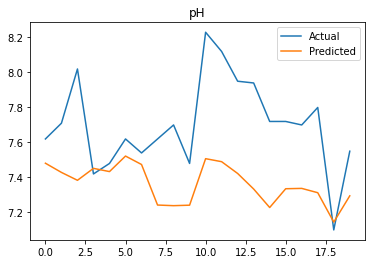

R2 score : -1.015
RMSE: 2.715


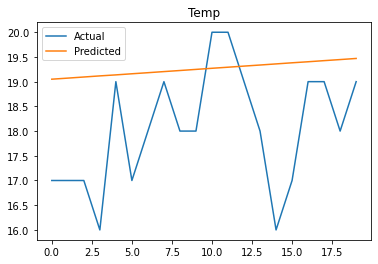

R2 score : -1.730
RMSE: 71.243


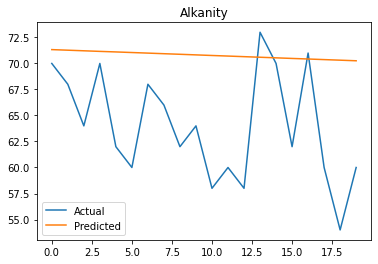

R2 score : 0.073
RMSE: 32.671


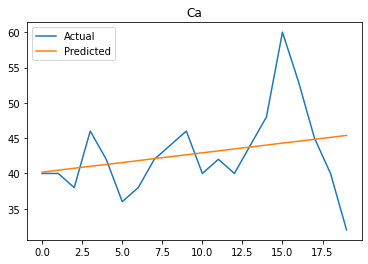

R2 score : -15.044
RMSE: 329.337


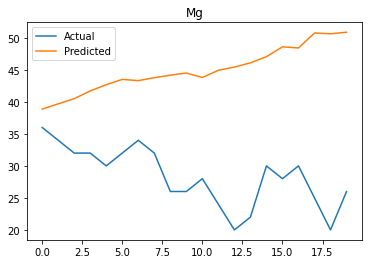

R2 score : -0.678
RMSE: 0.587


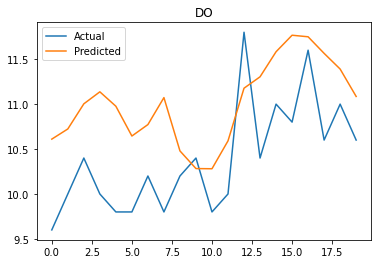

R2 score : -0.045
RMSE: 0.108


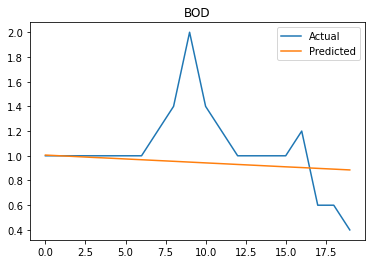

R2 score : -0.261
RMSE: 5.404


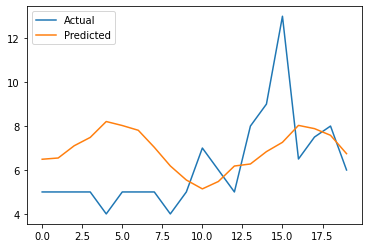

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
future = ph_test['ds']
future_ph = pd.DataFrame(future)
future_ph.columns = ['ds']
future_ph['ds'] = pd.to_datetime(future_ph['ds'])
# use the model to make a forecast
for i, j , k  in lis:
    forecast = i.predict(future_ph)
    y_true = j['y'].values
    y_pred = forecast['yhat'].values
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print('R2 score : %.3f' %r2)
    print('RMSE: %.3f' % rmse)
    # plot expected vs actual
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.title(k)
    plt.show()

In [16]:
#Hyperparameter tuning

In [27]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200] , 'daily_seasonality' : [True , False] ,'yearly_seasonality' : [True, False]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 120


In [18]:
ph_train

,ds,y
0,1995-06-01,8.00
1,1995-07-01,8.10
2,1995-08-01,7.90
3,1995-09-01,8.10
4,1995-10-01,8.10
...,...,...
276,2018-06-01,7.42
277,2018-07-01,7.45
278,2018-08-01,7.56
279,2018-09-01,7.68


In [32]:
model_parameters = pd.DataFrame(columns = ['RMSE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         interval_width=0.95)
    train_model.fit(mg_train)
    future = ph_test['ds']
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds'] = pd.to_datetime(future['ds'])
    # use the model to make a forecast
    forecast = train_model.predict(future)
    test=forecast[['ds','yhat']]
    Actual = mg_test
    RMSE = mean_squared_error(Actual['y'],abs(test['yhat']))
    print('RMSE------------------------------------',RMSE)
    model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()


{'changepoint_prior_scale': 0.1, 'daily_seasonality': True, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}
RMSE------------------------------------ 0.11892422052059441
{'changepoint_prior_scale': 0.1, 'daily_seasonality': True, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}
RMSE------------------------------------ 0.11892422052059441
{'changepoint_prior_scale': 0.1, 'daily_seasonality': True, 'n_changepoints': 100, 'seasonality_mode': 'additive', 'yearly_seasonality': True}
RMSE------------------------------------ 0.11689382758661844
{'changepoint_prior_scale': 0.1, 'daily_seasonality': True, 'n_changepoints': 100, 'seasonality_mode': 'additive', 'yearly_seasonality': False}
RMSE------------------------------------ 0.11689382758661844
{'changepoint_prior_scale': 0.1, 'daily_seasonality': True, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}
RMSE-----------------

RMSE------------------------------------ 0.13418669871184646
{'changepoint_prior_scale': 0.2, 'daily_seasonality': False, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}
RMSE------------------------------------ 0.13337902256701706
{'changepoint_prior_scale': 0.2, 'daily_seasonality': False, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}
RMSE------------------------------------ 0.13337902256701706
{'changepoint_prior_scale': 0.2, 'daily_seasonality': False, 'n_changepoints': 150, 'seasonality_mode': 'additive', 'yearly_seasonality': True}
RMSE------------------------------------ 0.13217195333427684
{'changepoint_prior_scale': 0.2, 'daily_seasonality': False, 'n_changepoints': 150, 'seasonality_mode': 'additive', 'yearly_seasonality': False}
RMSE------------------------------------ 0.13217195333427684
{'changepoint_prior_scale': 0.2, 'daily_seasonality': False, 'n_changepoints': 200, 'seasonality_mode': '

RMSE------------------------------------ 0.1578243268398802
{'changepoint_prior_scale': 0.4, 'daily_seasonality': True, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': True}
RMSE------------------------------------ 0.15554410635791854
{'changepoint_prior_scale': 0.4, 'daily_seasonality': True, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}
RMSE------------------------------------ 0.15554410635791854
{'changepoint_prior_scale': 0.4, 'daily_seasonality': True, 'n_changepoints': 200, 'seasonality_mode': 'additive', 'yearly_seasonality': True}
RMSE------------------------------------ 0.1585664479749178
{'changepoint_prior_scale': 0.4, 'daily_seasonality': True, 'n_changepoints': 200, 'seasonality_mode': 'additive', 'yearly_seasonality': False}
RMSE------------------------------------ 0.1585664479749178
{'changepoint_prior_scale': 0.4, 'daily_seasonality': False, 'n_changepoints': 100, 'seasonality_mode': 'multipl

RMSE------------------------------------ 0.16408920230727625


,RMSE,Parameters
0,0.116628,"{'changepoint_prior_scale': 0.1, 'daily_season..."
1,0.116628,"{'changepoint_prior_scale': 0.1, 'daily_season..."
2,0.116628,"{'changepoint_prior_scale': 0.1, 'daily_season..."
3,0.116628,"{'changepoint_prior_scale': 0.1, 'daily_season..."
4,0.116894,"{'changepoint_prior_scale': 0.1, 'daily_season..."


In [33]:
parameters.head(1)
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'daily_seasonality': False,
 'n_changepoints': 150,
 'seasonality_mode': 'additive',
 'yearly_seasonality': False}

In [ ]:
final_model = Prophet(
                      changepoint_prior_scale= 0.1,
                      n_changepoints = 150,
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(ph_train)

In [ ]:
ph_test

In [ ]:
future = ph_test['ds']
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = final_model.predict(future)

In [ ]:
y_true = ph_test['y'].values
y_pred = forecast['yhat'].values
rmse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print('R2 score : %.3f' %r2)
print('RMSE: %.3f' % rmse)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()